In [1]:
import random as rn
import numpy as np
import matplotlib.pyplot as plt
import datetime
plt.style.use('ggplot') 

In [2]:
class Date:
    def __init__(self, day, month, year):
        self.day = day
        self.month = month
        self.year = year
        self.weekday = datetime.datetime(self.year, self.month, self.day).weekday()  # 0 - monday, 6 - saturday !!!!!
        self.holiday = self.check_holiday(self.day, self.month, self.year)

    def easter(self, year):
        A = 24
        B = 5
        a = year % 19
        b = year % 4
        c = year % 7
        d = (a * 19 + A) % 30
        e = (2 * b + 4 * c + 6 * d + B) % 7
        day = 22 + d + e
        if day > 31:
            day = day - 31
            month = 4
        else:
            month = 3
        return month, day

    def check_holiday(self, day, month, year):
        '''Format przyjmowanej daty: day, month, year. Funkcja zwraca True gdy dzień jest świętem natomiast False gdzy dzień jest powszedni.'''

        holiday = [[1, 1], [1, 6], [5, 1], [5, 3], [5, 20], [5, 31], [11, 1], [11, 11], [12, 25], [12, 26]]
        x = self.easter(year)
        y = []

        if x[1] == 31:
            y.append(x[0]+1)
            y.append(1)
        else:
            y.append(x[0])
            y.append(x[1]+1)
        holiday.append(list(x))
        holiday.append(y)
        if [month, day] in holiday:
            return True
        else:
            return False

    def next_day(self):
        months_30 = [4, 6, 9, 11]
        months_31 = [1, 3, 5, 7, 8, 10, 12]
        if abs(2016 - self.year) % 4 == 0:
            feb = 29
        else:
            feb = 28

        self.day += 1
        if self.day > 27:
            if self.month in months_30:

                if self.day > 30:
                    self.day = 1

                    self.month += 1
            elif self.month in months_31:
                if self.day > 31:
                    self.day = 1
                    self.month += 1

                    if self.month == 13:
                        self.month = 1
                        self.year += 1

            else:
                if self.day > feb:
                    self.day = 1
                    self.month += 1

        self.weekday += 1
        self.weekday = self.weekday % 7

        self.holiday = self.check_holiday(self.day, self.month, self.year)

    def __str__(self):
        return '%d.%d.%d' % (self.day, self.month, self.year)

In [3]:
def y_generator(value=8):
    for i in range(value):
        y = int(value*rn.random())
        return y

In [4]:
def c_generator(li_1, y_p):
    c = li_1[0]/y_p
    for i in range(1, len(li_1)):
        if c < li_1[i]/y_p:
            c = li_1[i]/y_p
    return c

In [5]:
def variable(x_p=[1/10, 2/10, 1/20, 2/10, 1/20, 2/15, 2/15, 2/15], n=[0, 1, 2, 3, 4, 5, 6, 7]):
    x = []
    while True:
        u = rn.random()
        y = y_generator(len(x_p))
        y_p = 1/len(x_p)
        c = c_generator(x_p, y_p)
        if u <= x_p[y]/(y_p*c):
            x = y
            return n[x]

In [6]:
def cycles(start_year, end_year):
    x = range(start_year, end_year+1)
    out = []
    for i in x:
        if abs(i - 2016) % 4 == 0:
            out.append(366)
        else:
            out.append(365)
    return sum(out)

In [7]:
def check_days(month, year):
    months_30 = [4, 6, 9, 11]
    months_31 = [1, 3, 5, 7, 8, 10, 12]

    if month in months_31:
        return 31
    elif month in months_30:
        return 30
    else:
        if abs(2016 - year) % 4 == 0:
            return 29
        else:
            return 28

In [8]:
def clients_growth(n, oc, m_oc, m, ac, m_ac, mi, s_oc, repeat):
    ac_growth = []
    oc_growth = []
    for i in range(repeat):
        N = variable([0.5, 0.3, 0.2], [n, int(0.9 * n), int(n / 2)])
        Z = np.random.normal(0, 1)
        M = variable([0.1, 0.1, 0.4, 0.4], [n / 2, n / 3, n / 5, 50])

        new_clients_oc = np.random.poisson(mi * np.sqrt(M / oc) + s_oc / oc)

        if (oc / m_oc) ** 2.5 >= 1:
            client_lost_oc = np.random.binomial(N, 1)
        else:
            client_lost_oc = np.random.binomial(N, (oc / m_oc) ** 2.5)

        if n == 0:
            new_clients_ac = 0
        elif m / (n * ac) > 1:
            new_clients_ac = np.random.binomial(n, 1)
        else:
            new_clients_ac = np.random.binomial(n, m / (n * ac))

        if abs(Z) * ac / m_ac >= 1:
            client_lost_ac = np.random.binomial(m, 1)
        else:
            client_lost_ac = np.random.binomial(m, abs(Z) * ac / m_ac)

        oc_growth.append(new_clients_oc - client_lost_oc)
        ac_growth.append(new_clients_ac - client_lost_ac)
    return np.mean(oc_growth), np.mean(ac_growth)

In [9]:
def end_of_month(n, oc, m_oc, m, ac, m_ac, mi, s_oc):
    N = variable([0.5, 0.3, 0.2], [n, int(0.9 * n), int(n / 2)])
    Z = np.random.normal(0, 1)
    M = variable([0.1, 0.1, 0.4, 0.4], [n / 2, n / 3, n / 5, 50])

    new_clients_oc = np.random.poisson(mi * np.sqrt(M / oc) + s_oc / oc)

    if (oc/m_oc)**2.5 >= 1:
        client_lost_oc = np.random.binomial(N, 1)
    else:
        client_lost_oc = np.random.binomial(N, (oc / m_oc) ** 2.5)

    if n == 0:
        new_clients_ac = 0
    elif m/(n * ac) > 1:
        new_clients_ac = np.random.binomial(n, 1)
    else:
        new_clients_ac = np.random.binomial(n, m / (n * ac))

    if abs(Z) * ac / m_ac >= 1:
        client_lost_ac = np.random.binomial(m, 1)
    else:
        client_lost_ac = np.random.binomial(m, abs(Z) * ac / m_ac)

    n = n - client_lost_oc + new_clients_oc
    m = m - client_lost_ac + new_clients_ac

    if n < 0:
        n = 0
    if m < 0:
        m = 0

    return n, m

In [10]:
def poisson_process(f, T):
    t = 0
    i = 0
    times = []
    #M = max(0, f(fminbound(lambda x: -f(x), 0, T)))
    S = []
    varriable1 = rn.random()
    while True:
        t = t - (1/0.8)*np.log(varriable1)
        if t > T:
            return times
        if rn.random() <= 0.8/0.8:
            i += 1
            S.append(i)
            times.append(t)

In [11]:
def ac_pay_moments(T, m):
    times = []
    for i in range(m):
        t = 0
        flag = True
        while flag:
            helper = np.random.uniform(5, 5 + np.random.rayleigh(100))
            t = t + helper
            if t > T:
                flag = False
            if flag:
                times.append(np.ceil(t))
    return sorted(times)

In [12]:
def when_pay_ac(day, list_of_times):
    accidents = 0
    for i in range(len(list_of_times)):
        if day == list_of_times[0]:
            accidents += 1
            list_of_times.pop(0)
        else:
            return accidents, list_of_times

In [13]:
def five_sigmas(data):
    quilty = []
    std = np.std(data)
    for i in data:
        if i >= 5 * std:
            quilty.append(i)
    return quilty

In [14]:
def pareto(k, x_m, n=1):
    if n > 1:
        out = []
        for _ in range(n):
            u = rn.random()
            out.append(x_m/((1-u)**(1/k)))
        return out
    else:
        u = rn.random()
        return [x_m/((1-u)**(1/k))]

In [15]:
def lambdas():
    '''Dla dni'''
    days = [4894, 4815, 4831, 4945, 5675, 4625, 3879]
    x = np.mean(days)
    '''Stosunkowo blisko średniej 4809.143, jest wtorek 4815 zatem lambda = 1.'''
    for i in range(len(days)):
        days[i] = round(days[i]/4815, 3)
    '''Dla miesięcy.'''
    months = [2195, 1896, 2168, 2318, 3108, 3375, 3646, 3645, 3590, 3645, 3059, 3202]
    '''Nie mamy dostatecznie bliskiej wartości wypadków w stosunku do średniej 2987.25 zatem to dla niej
    nasza lambda2 będzie równa 1.'''
    for i in range(len(months)):
        months[i] = round(months[i]/2987.25, 3)
    return days, months

In [16]:
def oc_strategy(oc, m_oc, n, paid_last_month):
    paid = sum(paid_last_month)
    if n <= 1500:
        oc = 1/2 * oc
    else:
        oc = paid/n * 6/5

    if n <= 1500:
        mi = 150 * oc
    else:
        mi = 40 * oc

    while oc/m_oc >= 1:
        oc = oc * 7/10

    return oc, mi

In [17]:
def ac_strategy(ac, m_ac, m, paid_last_month):
    paid = sum(paid_last_month)
    if m == 0:
        ac = 1/4 * ac
    else:
        ac = paid/m * m_ac
    if ac < 10:
        ac = 10
    while ac/m_ac > 1/4:
        ac = ac/2
    return ac

In [18]:
def paris_ruin(k, n, oc, m_oc, m, ac, m_ac, mi, s_oc, start_year, end_year, flag=False, text=False, strategy=False):
    '''  k_0 - kapitał początkowy, n - liczba początkowych sprzedanych polis oc, oc- cena jednej polisy oc,
    m - liczba początkowo sprzedanyh polis ac, ac - cena jednej policy ac, m_oc, m_ac - są to odpowienio popyt
    na polisy oc i ac, mi - nakłady przeznaczane na marketing, s_oc - stała związana z popytem na polisy oc '''

    lambda_days = [1.016, 1.0, 1.003, 1.027, 1.179, 0.961, 0.806]

    lambda_months = [0.735, 0.635, 0.726, 0.776, 1.04, 1.13, 1.221, 1.22, 1.202, 1.22, 1.024, 1.072]

    lambd_month = lambda_months[0]

    date = Date(1, 1, start_year)

    k_0 = k

    W_i = sum(np.random.exponential(0.05, n))

    count_oc_accidents = 0

    ac_accidents = ac_pay_moments(check_days(date.month, date.year), m)

    days = cycles(start_year, end_year)

    it = 1

    n_list = [n]
    m_list = [m]

    credit = 0
    is_credit = False
    bankruptcy_time = 0
    credit_time = 0

    kapital = []
    t = []

    holder = []

    paid_per_month = []
    paid_ac_per_month = []

    while days >= it:
        kapital.append(k)
        t.append(it)

        '''Warunki bankructwa'''
        if k < -2*k_0 - n*ac:
            quilty = five_sigmas(holder)
            return 0, kapital, t, quilty, n_list, m_list, count_oc_accidents

        if k < 0:
            bankruptcy_time += 1
        else:
            bankruptcy_time = 0

        if bankruptcy_time == 730:
            quilty = five_sigmas(holder)
            return 0, kapital, t, quilty, n_list, m_list, count_oc_accidents

        '''Podstawowe intensywności dla różnych rodzajów dni'''
        if date.holiday:
            lambd = lambda_months[7] * lambda_days[4]
        else:
            lambd_day = lambda_days[date.weekday]
            lambd = lambd_day * lambd_month

        '''Codzienne wypłaty.'''
        if W_i == 0:
            accidents = []
        else:
            accidents = poisson_process(lambd * W_i, 1)

        count_oc_accidents += len(accidents)/n

        if len(accidents) != 0:
            to_pay_oc = sum(pareto(8.26, 200, len(accidents)))
        else:
            to_pay_oc = 0

        ac_accidents_now = ac_accidents.count(date.day)

        if ac_accidents_now != 0:
            li_ac = []
            for i in range(ac_accidents_now):
                li_ac.append(min(abs(np.random.standard_cauchy(1)[0])/2, 500*ac))
                to_pay_ac = sum(li_ac)
        else:
            to_pay_ac = 0

        k = k - to_pay_oc - to_pay_ac
        paid_ac_per_month.append(to_pay_ac * ac_accidents_now)
        paid_per_month.append(to_pay_oc)
        holder.append(to_pay_oc)


        '''Kredyt.'''
        if is_credit:
            credit_time += 1

        if k < 0 and not is_credit:
            credit = 120*n
            credit_0 = credit
            k += credit
            is_credit = True

        if credit_time > 182 and (credit_time - 182) % 30 == 0:
            credit = credit - 1/12 * credit_0
            if credit == -8/12 * credit_0:
                is_credit = False
                credit_time = 0

        date.next_day()
        '''Sprawdzamy czy dzień jest ostatnim w miesiącu. '''
        if 1 == date.day:

            if strategy:
                hold_this = oc_strategy(oc, m_oc, n, paid_per_month)
                oc = hold_this[0]
                ac = ac_strategy(ac, m_ac, m, paid_ac_per_month)
                mi = hold_this[1]

            k -= mi
            helper = end_of_month(n, oc, m_oc, m, ac, m_ac, mi, s_oc)
            n = helper[0]
            m = helper[1]
            ac_accidents = ac_pay_moments(check_days(date.month, date.year), m)
            W_i = sum(np.random.exponential(0.05, n))

            n_list.append(n)
            m_list.append(m)

            if text:
                print(n, m, oc, ac)

            lambd_month = lambda_months[date.month - 1]

            k = k + n * oc + m * ac
            #print(sum(paid_per_month), n*oc, n)
            paid_ac_per_month = []
            paid_per_month = []
        if k >= 10**6 and flag:
            quilty = five_sigmas(holder)
            return 1, kapital, t, quilty, n_list, m_list

        it += 1

    quilty = five_sigmas(holder)

    if flag:
        return 0, kapital, t, quilty, n_list, m_list
    else:
        return 1, kapital, t, quilty, n_list, m_list, count_oc_accidents

# Zadanie 2 Firma ubezpieczeniowa

## 1. Wstęp

### 1.1 Proces ryzyka

W tym zadaniu będziemy zajmować się procesem ryzyka czyli takim, który opisuje kapitał firmy ubezpieczeniowej $R$ w czasie $t$. W ogólności będziemy korzystać z wzoru:
$$R(t) = k_0 + c(t) - \sum_{i=1}^{N(t)}X_{i}$$
gdzie:
- $k_0$ - kapitał początkowy,
- $c(t)$ - premia (czyli przychód) w czaise $t$,
- $N(t)$ - proces liczący ilość szkód w czasie $t$,
- $X_i$ - wielkość wypłacanego odszkodowania dla i-tej szkody.<br>

Przyjmuje się, że wypłaty $X_i$ są niezależnymi zmiennymi losowymi o jednakowym rozkładzie. W standardowym modelu premia $c(t)$ jest funkcją liniową co znaczy, że przyjmuje postać $c(t) = at$, gdzie $a>0$. Znając rozkład zmiennych losowych $X_i$ oraz rodzaj i intensywność procesu liczącego $N(t)$ możemy numerycznie (w szczególnych przypadkach analitycznie) wyznaczyć funckję premii tak aby wartość oczekiwana $ER(t)$ była większa od zera.<br>

Przyjmijmy zatem, że $N(t)=\tilde{N}(t\Lambda)$, gdzie $\Lambda$ jest zmienną losową natomiast $\tilde{N}(t)$ jest jednorodnym procesem Poissona z intensywnością $\lambda=1$. Załóżmy także, że $E|X_i| < \infty$. Zatem wartość oczekiwana wysokości wypłat odszkodowań w czasie $t$ wynosi:

$$E\sum_{i=1}^{N(t)}X_{i}=E\left(E\left(\sum_{i=1}^{N(t)}X_{i}|N(t)\right)\right)$$

Stosując podstawienie $N(t)=\tilde{N}(t\Lambda)$ otrzymujemy:

$$E\left(E\left(\sum_{i=1}^{\tilde{N}(t\Lambda)}X_{i}|\tilde{N}(t\Lambda)\right)\right)$$

Z niezależności otrzymujemy:

$$E(N(t)EX_i)=tE\Lambda EX_i$$

Przyjęło się jednak, że do wzoru $ER(t)$ zamiast wartości $E\Lambda$ wstawia się $\Lambda$, ponieważ z powodu możliwych dużych rozbieżności pomiędzy średnią $E\Lambda$ a wartościami, prawdopodobieństwo bankructwa byłoby bardzo wysokie. Aby prowadzenie firmy było opłacalne musi ona przynosić zyski. Wprowadzimy zatem tak zwany współczynnik zabezpieczający $\theta>0$ oraz przyjmijmy oznaczenie $EX_i = \mu$. W tym przypadku funkcja premii ma postać:

$$c(t)=t\mu\Lambda(1+\theta)$$

Wstawiając wyznaczoną funkcje $c(t)$ do wzoru na kapitał firmy w czasie $t$ otrzymujemy:

$$ER(t)=k_0 + t\mu\Lambda(1+\theta) - t\mu\Lambda$$

Ostatecznie dostajemy:

$$ER(t) = k_0 + t\mu\Lambda\theta$$

### 1.2 Omawiany model

Rozpatrywany przez nas model będzie znacznie bardziej rozbudowany, ponieważ tylko w przypadku dużej firmy przychód może być funkcją liniową. Zajmiemy się przypadkiem gdy przedsiębiorstwo otrzymuje comiesięczne przychody zależne od ceny polis ubezpieczeniowych oc, ac oraz liczby ludzi, którzy w danym miesiącu zdecydowali się je kupić.

Przyrost klientów firmy ubezpieczeniowej w każdym miesiącu jest bardzo mocno zależny od pewnych czynników. Są nimi ilość sprzedanych polis w zeszyłym miesiącu, popyt na polisy oc i ac, kapitał wydany na marketing. Wprowadźmy zatem pewne oznaczenia:
- $n_p$ - liczba sprzedanych polis oc w poprzednim miesiącu,
- $n_n$ - liczba nowych klientów kupujących polisy oc początku każdego miesiąca,
- $n_l$ - liczba klientów rezygnujących z polis oc na początku każdego miesiąca,<br>

przy czym:

$$n_n \sim \mathcal{Poiss}\left(\mu\sqrt{\frac{M}{c_{oc}}} + \frac{s_{oc}}{c_{oc}}\right)$$

gdzie $\mu$ jest kapitałem wydanym na marketing w bierzącym miesiącu, $M$ dane jest rozkładem $P\left(M=\frac{n_p}{2}\right)=P\left(M=\frac{n_p}{3}\right)=0.1, P\left(M=\frac{n_p}{5}\right)=P\left(M=50\right)=0.4$, $c_{oc}$ jest ceną pojedyńczej polisy oc, natomiast $s_{oc}$ jest stałą związaną z popytem. Liczba klientów rezygnujących z polis oc dana jest rozkładem 

$$n_l \sim \mathcal{B}\left(N, \left(\frac{c_{oc}}{m_{oc}}\right)^{2.5}\right)$$

gdzie $N$ dane jest rozkładem $P\left(N=n_p\right)=0.5, P\left(N=\lfloor0.9n_p\rfloor\right)=0.3, P\left(N=\left\lfloor\frac{n_p}{2}\right\rfloor\right)=0.2$ oraz $m_{oc}$ jest popytem na polisy oc. Zatem liczba sprzedanych polis oc $n$ w każdym miesiącu można przedstawić wzorem:
$$n = n_p + n_n - n_l$$

Wyznaczmy także liczbę sprzedanych polis ac w bierzącym miesiącu $m$:
- $m_p$ - liczba sprzedanych polis ac w poprzednim miesiącu,
- $m_n$ - liczba nowych klientów kupujących polisy ac na początku każdego miesiąca,
- $m_l$ - liczba klientów rezygnujących z polis ac na początku każdego miesiąca,

przy czym:

$$m_n \sim \mathcal{B}\left(n_p, \frac{m_p}{n_pc_{ac}}\right)$$

tutaj $c_{ac}$ to cena pojedyńczej polisy ac. Zatem liczbę sprzedanych polis ac w każdym miesiącu można przedstawić wzorem:
$$m = m_p + m_n - m_l$$

Tak więc comiesięczny przychód naszej firmy będzie przedstawiał się wzorem:
$$c = nc_{oc} + mc_{ac}$$

Wiemy zatem skąd nasza firma pozyskuje przychody oraz jak one wyglądają. Wydatki naszej firmy będziemy sprawdzać każdego dnia. Liczbę wypadków $N(t)$, za które zapłacimy z racji posiadania poolisy oc będzie opisywać mieszany proces Poissona z intensywnością $\lambda(t)$ wyrażającą się wzorem:
$$\lambda(t)=\sum_{i=1}^{n(t)}W_i(t)\lambda_0(t)$$

Tutaj $n(t)$ jest bieżącą liczbą kierowców z polisą oc, $W_i$ to zmienna losowe iid. z rozkładu wykładniczego z parametrem $\lambda=0.05$ każda z tych zmiennych odpowiada za umiejętności jazdy jednego kierowcy (będziemy je generować od nowa na koniec każdego miesiąca) natomiast $\lambda_0(t)$ jest zmienną odpowiadającą za modelowanie częstości występowania wypadków w danym okresie. Z racji, że będziemy badać ilość wypadków od początku do końca każdego dnia przyjmiemy wzór:
$$\lambda(t)=\lambda_0\sum_{i=1}^{n}W_i$$

gdyż w danym momencie wartości te będą ustalone. Zatem wartość odszkodowańz tytułu oc $O$, które wypłacimy każdego dnia możemy wyrazić wzorem $$O=\sum_{j=1}^{N(1)}X_j$$

gdzie $X_j$ to zmienne losowe z rozkładu Pareto.

Dodatkowo nasza firma będzie wypłacać odszkodowania z tytułu ac. Liczbę wypadków będziemy generować za pomocą procesu odnowy, w którym czasy oczekiwania $T_i \sim \mathcal(5, 5+V_i)$, gdzie $V_i$ są zmiennymi losowymi z rozkładu u Rayleigha o sredniej
$100$. Z racji, że na początku miesiąca znamy ilość sprzedanych polis ac oraz fakt, że zadany proces odnowy $N_2(t)$ w pojedyńczej jednostce czasu zawsze da wynik $0$ będziemy generować wypadki na cały miesiąc z góry. Wysokościami odszkodowań natomiast będą zmienne losowe $Y_i$ o rozkładzie $min\left\{\frac{C_i}{2},500c_{ac}\right\}$, gdzie $C_i$ pochodzi z standardowego rozkładu Cauchy'ego. Zatem dzienne wypłaty odszkodowań z tytułu ac możemy zapisać jako:
$$A = \sum_{i=1}^{p}Y_i$$

gdzie $p$ jest liczbą wypłat odszkodowań z tytułu ac w danym dniu.

### 1.3 Rozkład a priori i a posteriori

Prawdopodobieństwem a priori nazywamy prawdopodobieństwo, które obliczamy przed realizacją pewnego doświadczenia losowego.

Prawdopodobieśtwo a posteriori to takie, które obliczamy po zrealizowaniu pewnego doświadczenia losowego.

### 1.4 Rozkład Pareto 

Rozkład Pareto jest ciągłym rozkładem prawdopodobieństwa, który jest wykorzystywany między innymi do modelowania pojemności złóż ropy naftowej oraz co istotne dla nas używa się go w symulacjach wielkości wypłacanych odszkodowań poszkodowanym przez firmę ubezpieczeniową. Kolejną ważną informacją jest fakt, że znamy teoretyczną dystrybuantę oraz gęstość rozkładu. Dystrybuanta wyraża się wzorem:

$$F(x) = 1- \left(\frac{x_m}{x}\right)^k,\quad x\in[x_m, \infty)$$

Natomiast gęstość ma postać:
$$f(x) = \frac{kx_m^k}{x^{k+1}},\quad x\in[x_m, \infty)$$

Przy czym $k>0$ jest parametrem kształtu natomiast $x_m>0$ jest parametrem skali.

Powyższe wzory są bardzo istotne, gdyż dzięki temu nie będziemy mieli problemu z generowaniem zmiennych losowych z tego rozkładu. Warto zauważyć, że rozkład Pareto jest rozkładem ciężko-ogonowym co oznacza, że pewne realizacje zmiennych losowych z tego rozkładu znacząco większe od pozostałych zamiennie będziemy je nazywać "dużymi realizacjami". Im większy jest parametr kształtu $k$ tym rzadziej występują duże realizacje zmiennych losowych. Parametr skali natomiast ustala nam najmniejszą możliwą wartość zmiennej losowej $X$ z rozkładu Pareto.

## 2. Problem badawczy

### 2. 1 Wstęp 

W tym zadaniu skupimy się na implementacji, zaproponowanego modelu procesu ryzyka oraz przeanalizowaniu i zinterpretowaniu otrzymanych wyników. Warto zaznaczyć, że nie zostały narzucone żadne dane początkowe. Jesteśmy zatem zmuszeni dobrać je w sensowny sposób, np. sugerując się danymi rzeczywistymi bądź dostosowując je do modelu (nie jest powiedziane, że model będzie "współpracował" z danymi rzeczywistymi).

### 2.2 Generowanie rozkładu Pareto

Na początku zajmiemy się generowaniem rozkładu Pareto. Będziemy go potrzebować do modelowania wielkości odszkodowań, które będzie musiała wypłacić firma ubezpieczeniowa w razie wystąpienia wypadku. Wykorzystamy do tego metodę odwracania dystrybuanty ze względu na jej szybkość. W tym celu na początku musimy wyznaczyć wzór na funkcję $F^{-1}(x)$. W pierwszym kroku wykonamy podstawienie $F(x) = y$, przeniesiemy $1$ na drugą stronę równości i przemnożymy równanie obustronnie<br>przez $-1$ stąd otrzymamy:

$$\left(\frac{x_m}{x}\right)^k = 1 - y$$

Następnie równanie podniesiemy obustronnie do potęgi $-\frac{1}{k}$:

$$\frac{x}{x_m} = \frac{1}{(1-y)^{\frac{1}{k}}}$$

Ostatecznie równanie mnożymy obustronnie przez $x_m$ i podstawiamy $x=F^{-1}(y)$ w ten sposób otrzymujemy wzór na dystrybuantę odwrotną, która wyraża się wzorem:

$$F^{-1}(y) = \frac{x_m}{\sqrt[k]{(1-y)}}$$

Następnie skorzystamy z algorytmu na generowanie zmiennych losowych za pomocą metody odwrócenia dystrybuanty, który prezentuje się następująco:

1. Generuj $U \sim \mathcal{U}(0,1)$,
2. wstaw $ X = \frac{x_m}{\sqrt[k]{(1-U)}}$

### 2.3 Wyznaczanie $\lambda_0(t)$

Tak jak wspomnieliśmy w wstępie dzienna liczba wypłat odszkodowań z tytułu oc jest generowana przez miesany proces Poissona z intensywnością $\lambda$ daną wzorem:$$\lambda=\lambda_0\sum_{i=1}^{n}W_i$$

O ile zmienne losowe $W_i$ jesteśmy łatwo generować za pomocą biblioteki numpy o tyle parametr $\lambda_0$ musimy wyznaczyć korzystając z danych rzeczywistych. Wykorzystując dane udostępnione przez Komendę Główną Policji w 2013r. (załączamy je do sprawozdania) z danych wyznaczyliśmy średnią ilość wypadków w każdym mieściącu, która wyniosła $2987.25$ tak więc dla tej wartości $\lambda_1=1$. Średnia liczba wypadków dla każdego dnia tygodnia wyniosła $4809.143$. W wtorki tego roku doszło do $4815$ wypadków. Stosunek średniej wartości oraz liczby wypadków w wtorki wynosi $0.02\%$ zatem możemy przyjąć, że $\lambda_2=1$ we wtorki. Dla pozostałych dni wartości $\lambda_1$, $\lambda_2$ są wyliczane przez proporcje liczby wypadków do średniej liczby wypadków. Tak więc wartość $\lambda_0(t)$ dla danego dnia można wyrazić za pomocą wzoru:
$$\lambda_0(t)=\lambda_1(t)\lambda_2(t)$$

Musimy jednak uwzględnić pewien wyjątek. Raport nie wspomina o zmianach częstości wypadków w okolicach dni świątecznych. Z racji tego, że zdajemy sobie sprawę, że częstość wzrasta oraz z braku rzetelnych danych postanowiliśmy wtedy przyjąć, że $\lambda_0(t)=max(\lambda_1(t))max(\lambda_2(t))$.

### 2.4 Symulowanie zaproponowanego modelu

Napisaliśmy funkcję odpowiadającą za symulowanie naszego procesu ryzyka. Wyznaczyliśmy pewne stałe popytu $m_{oc}$ oraz $m_{ac}$ tak aby firma mogła pozyskiwać klientów dla w miare sensownych cen polis oc i ac. Dobraliśmy także parametry rozkładu Pareto tak aby najmniejsze możliwe odszkodowanie z tytułu oc było nie mniejsze niż $200$ stąd w naszym przypadku $x_m=200$, oraz dobraliśmy parametr kształtu $k=8.26$, gdyż nie chcieliśmy aby duże realizacje pojawiały się zbyt często. Dodatkowo dzięki temu wariancja naszych odszkodowań wynosi około $1000$:

$$Var(X) = \frac{x^2_mk}{(k-1)^2(k-2)}=1001.36$$

Jednym z elementów naszego modelu jest funkcja odpowiadająca za to co dzieje się na początku każdego miesiąca. To znaczy generuje nam wymienione we wstępie rozkłady i wyznacza liczbę sprzedanych polis oc i ac w bierzącym miesiącu. Pseudokod prezentuje się następująco (wykorzystamy te same oznaczenia co w wstępie teoretycznym):

1. Generuj po jednej realizacji niezależnych zmiennych losowych $N$, $|Z|$, $M$,
2. jeżeli $\left(\frac{c_{oc}}{m_{oc}}\right)^{2.5} > 1$ wstaw  $\left(\frac{c_{oc}}{m_{oc}}\right)^{2.5}=1$ w przeciwnym wypadku pozostaw bez zmian,
3. jeżeli $n_p=0$ to $m_n=0$,
4. jeżeli $\frac{m_p}{n_pc_{ac}}>1$ wstaw $\frac{m_p}{n_pc_{ac}}=1$ w przeiwnym wypadku pozostaw bez zmian,
5. jeżeli $|Z|\frac{c_{ac}}{m_{ac}}>1$ wstaw $|Z|\frac{c_{ac}}{m_{ac}}=1$ w przeciwnym wypadku pozostaw bez zmian,
6. generuj po jednej realizacji niezależnych zmiennych losowych $n_n$, $n_l$, $m_n$, $m_l$,
7. wstaw $n=n_p+n_n-n_l$, $m=m_p+m_n-m_l$
8. jeżeli $n<0$ wstaw $n=0$,
9. jeżeli $m<0$ wstaw $m=0$,
10. zwróć $n$, $m$

Opisana wyżej funkcja idealnie prezentuje całość kodu. Cała trudność w implementowaniu skupiła się na sprawdzaniu warunków oraz generowaniu zmiennych losowych z zadanych przedziałów. Dodając do tego fakt, że pseudo kod byłby bardziej nieczytelny niż sam kod postanowiliśmy nie zamieszać go. Warto jedank wspomnież, iż pętla główna kodu zatrzymuje się gdy firma nie zbankrutuje w zadanym horyzoncie czasowym $T$ w takim przypadku zwracamy $1$ w przypadkach gdy kapitał firmy przekroczy $-2k_0 - nc_{ac}$ lub będzie ujemny ciągle przez 2 lata firma bankrutuje a funkcja zwraca $0$, $k_0$ jest tutaj kapitałem początkowym. Patrząc na to warto mieć na uwadze, że ilość sprzedanych polis oc może znacząco wpływać na to, że firma nie zbankrutuje przez kilka bardzo dużych odszkodowań.

## 3. Rozwiązanie

### 3.1 Generowanie rozkładu Pareto

Poniżej przedstawiamy histogram z wygenerowanych liczb pseudolosowych za pomocą powyżeszego algorytmu. Na wykresie umieściliśmy także wizualizację funkcji gęstości teoretycznej rozkładu Pareto, która perfekcyjnie pokrywa się z histogramem.

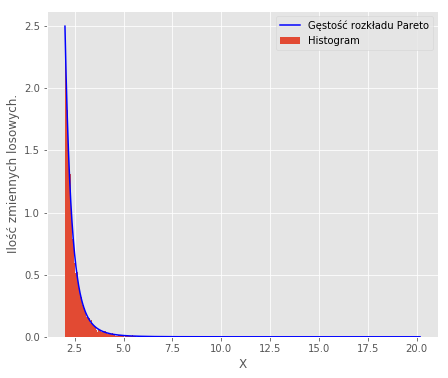

In [5]:
x_m = 2
k =  5
x = pareto(k, x_m, 10000)
q = np.arange(x_m, max(x)+3, 0.01)
f = k*x_m**k/(q**(k+1))
plt.figure('Histogram',figsize=(7,6))
plt.hist(x, normed=True, bins='auto', label='Histogram')
plt.xlabel('X')
plt.ylabel('Ilość zmiennych losowych.')
plt.plot(q, f, 'b', label='Gęstość rozkładu Pareto')
plt.legend()
plt.show()

### 3.2 Wartości $\lambda_1(t)$ oraz $\lambda_2(t)$

Poniżej przedstawiamy poszczególne wartości lambd dla dni tygodnia oraz miesięcy. Umieszaczamy także jaki procent całości stanowi wartość różnicy liczby wypadków w wtorki a prawdziwą średnią wartością w stosunku do ogólnej liczby wypadków w danym roku.

In [21]:
(4815-4809.143)/sum([4894, 4815, 4831, 4945, 5675, 4625, 3879])*100

0.01739840779467672

In [20]:
print('Wartości lambd dla dni tygodnia:', lambdas()[0])
print('Wartości lambd dla poszczególnych miesięcy tygodnia:', lambdas()[1])

Wartości lambd dla dni tygodnia: [1.016, 1.0, 1.003, 1.027, 1.179, 0.961, 0.806]
Wartości lambd dla poszczególnych miesięcy tygodnia: [0.735, 0.635, 0.726, 0.776, 1.04, 1.13, 1.221, 1.22, 1.202, 1.22, 1.024, 1.072]


### 3.3 Przypadek nieoczywistego sukcesu

Na początku chcieliśmy aby średnia naszego rozkładu była zgodna z danymi rzeczywistymi czyli wynosiła około $4500$ jednak ze względu na sporą niestabilność modelu dobranie innych parametrów okazało się zbyt skomplikowane (jeżeli nie niemożliwe). Firma zwykle bankrutowała w ciągu pierwszego roku mając do dyspozycji bardzo duży kapitał początkowy wynoszący $10^7$. To niedopracowanie modelu jest zapewne spowodowane przez niewłaściwy dobór intensywności mieszanego procesu Poissona. Średnia roczna ilość wypadków, w których brał udział pojedyńczy kierowca wynosi około $17$ co nawet ze względu na zdrowy rozsądek wydaje się niemożliwe. Serwis Onet podaje, że dla grupy  najbardziej wypadkowej czyli w przedziale wiekowym 17-24 wskaźnik wypadków to około $18.4$ na $10000$. Stąd tak drastyczna różnica pomiędzy naszym modelem a rzeczywistością. Poniżej zamieszaczmy kilka wizualizacji zmiany kapitału w docelowym czasie 10 lat pracy firmy. Widać na nich, że przychody jak i wydatki firmy są skokowe. Na wykresach widać skoki, które są znacznie większe od pozostałych. Są to duże realizacje zmiennych losowych z rozkładów ciężko-ogonowych Cauchy'ego oraz Pareto. Czasem można zaobserwować bardzo duży skok w górę. Gdy mamy bardzo dużo klientów firma może wziąć bardzo duży kredyt i kiedy kapitał firmy jest mniejszy od 0 zaciągany jest kredyt. Przez konstrukcję programu na wykresie odnotowujemy to jako znaczący skok w górę. Zamieściliśmy także skrypt za pomocą, którego używając metody monte carlo wyznaczamy prawdopodobieństwo ruiny firmy ubezpieczeniowej w okresie dziesięciu lat, które wynosi w tym przypadku około $55\%$. 

Wyświetliliśmy także histogramy liczby sprzedanych polis oc i ac jednak w tym przypadku wielkość próby jest zbyt mała by potwierdzać jakąkolwiek hipotezę. 

In [71]:
repeat = 5000
s = 0
for i in range(repeat):
    x = paris_ruin(k=500000, n=100, oc=120, m_oc=350, m=100, ac=40, m_ac=320, mi=25, s_oc=0, 
                   start_year=2000,end_year=2000, flag=False, text=False, strategy=False)
    s += x[-1]
print(s/repeat)

20.766098086035502


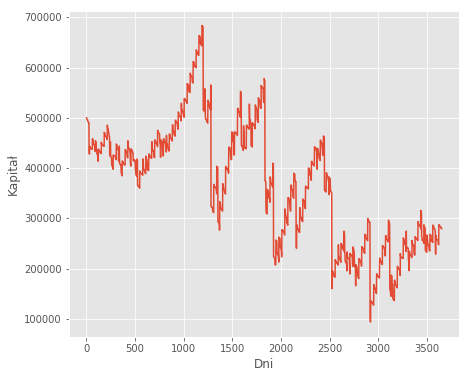

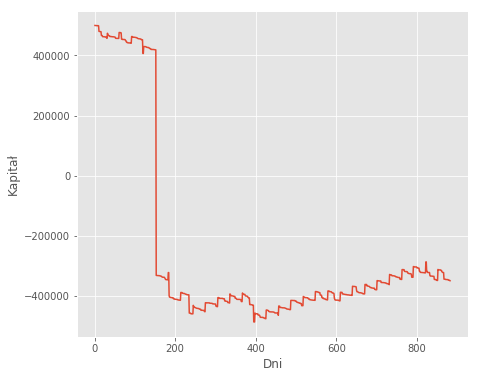

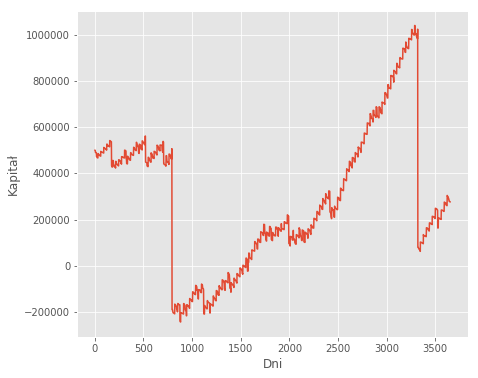

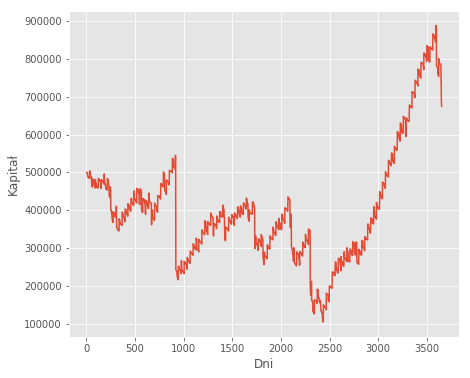

In [81]:
'''Kilka wizualizacji'''
for i in range(4):
    plt.figure(figsize=(7,6))
    x = paris_ruin(k=500000, n=100, oc=120, m_oc=240, m=100, ac=40, m_ac=320, mi=70, s_oc=0, 
                   start_year=2000,end_year=2009, flag=False, text=False, strategy=False)
    plt.xlabel('Dni')
    plt.ylabel('Kapitał')
    plt.plot(x[2], x[1])
plt.show()



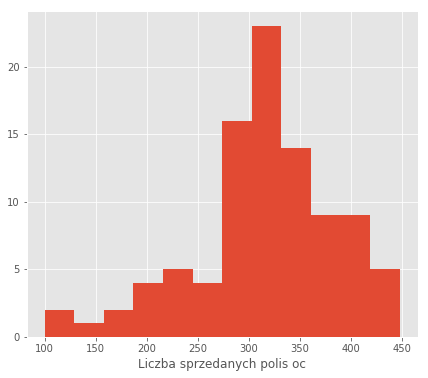

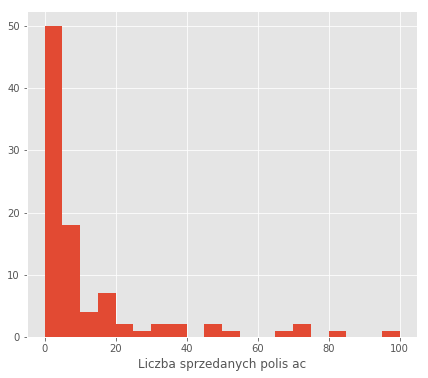

In [93]:
 x = paris_ruin(k=500000, n=100, oc=120, m_oc=240, m=100, ac=40, m_ac=320, mi=70, s_oc=0, 
                   start_year=2000,end_year=2040, flag=False, text=False, strategy=False)
plt.figure(1, figsize=(7, 6))
plt.xlabel("Liczba sprzedanych polis oc")
plt.hist(x[-3], bins='auto')
plt.figure(2, figsize=(7, 6))
plt.xlabel("Liczba sprzedanych polis ac")
plt.hist(x[-2], bins='auto')
plt.show()

In [84]:
repeat = 500
s = 0
for i in range(repeat):
    x = paris_ruin(k=500000, n=100, oc=120, m_oc=240, m=100, ac=40, m_ac=320, mi=70, s_oc=0, start_year=2000,end_year=2009, flag=False, text=False, strategy=False)
    s += x[0]
print('Prawdopodobieństwo ruiny wynosi:', 1-s/repeat)

Prawdopodobieństwo ruiny wynosi: 0.554


### 3.4 Przypadek nierzeczywistego sukcesu

Obserwując jak skonstruowany jest nasz model zaczęliśmy zastanawiać się czy firma jest w stanie utrzymać się mając ogromną liczbę sprzedanych polis oc przy tym utrzymując cenę pojedyńczej polisy na nieprawdopodobnie małym poziomie. Okazało się, że firma nie tylko funkcjonuje dobrze ale i znacznie lepiej niż przy poprzednich wartościach. Jest to spowodowane konstrukcją modelu. Liczb nowych jak i rezygnujących z polis klientów jest mocno zależna od ceny polisy natomiast każdy nowy kierowca zwiększa jeden z czynników intensywności o średnio $0.05$ co jest niewielką wartością natomiast miesięczny przychód firmy wzrasta o $0.1$ co w ogólności proawdzi nas to większego przychodu. Tutaj duże skoki w górę są bardzo widoczne, gdyż maksymalna wartość kredytu jest zależna od liczby sprzedanych polis oc a dokładnie wynosi $120n$ co także wpływa na prawdopodobieństwo ruiny, gdyż musi wystąpić naprawdę duża realizacja aby firma zbankrutowała nawet gdy zaciągnie kredyt. Prawdopodobieństwo ruiny w ciągu 5 lat wynosi około $8\%$. Zdecydowaliśmy się na tak niewielki horyzont czasowy z uwagi na długość trwania programu. Dosyć mocno ograniczyliśmy również ilość powtórzeń monte carlo. Istnieje więc większe prawdopodobieństwo, że różnice pomiędzy wynikami różnych prób będą większe niż zazwyczaj. 

Zbadaliśmy także rozkłady liczby sprzedanych poli oc i ac. Histogramy sugerują, że w obu przypadkach mamy do czynienia z rozkładem Pareto. Wiemy, że liczby klientów są liczbami całkowiymi nieujemnymi. Pomimo tego możemy o nich myśleć jak o zmiennych losowych z rozkładu Pareto o pewnych parametrach, który jest rozkładem ciągłym.

Na samym końcu sprawdziliśmy zależność comiesięcznych przyrostów sprzedanych polis ac. Wynik jest zgodny z naszymi oczekiwaniami zważywszy na konstrukcje parametrów rozkładu, z których pochodzi. Liczby oscylują w okolicy pewnego obszaru jednak pomimo tego, że cena polisy ac stanowi tylko $\frac{1}{8}$ popytu na te polisy średni przyrost jest ujemny co świadczy o tym, że liczba sprzedanych polis ac zbiega do $0$. Z racji tego z jakiego rozkładu są nowi klienci kupujący polisy ac dla przypomnienia:

$$m_n \sim \mathcal{B}\left(n_p, \frac{m_p}{n_pc_{ac}}\right)$$

wiemy, że gdy liczba sprzedanych polis ac spadnie do $0$ to już zawsze taka pozostanie.

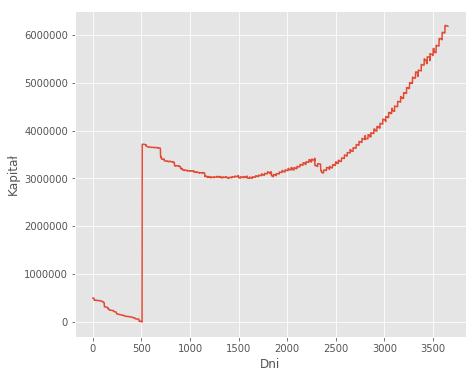

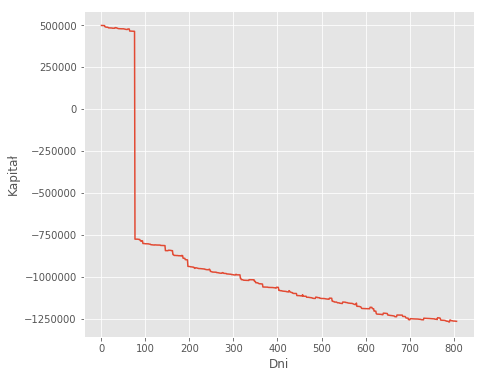

In [85]:
for i in range(2):
    plt.figure(i, figsize=(7,6))
    x = paris_ruin(k=500000, n=100, oc=0.1, m_oc=350, m=100, ac=40, m_ac=320, mi=25, s_oc=0, 
                   start_year=2000,end_year=2009, flag=False, text=False, strategy=False)
    plt.xlabel('Dni')
    plt.ylabel('Kapitał')
    plt.plot(x[2], x[1])
plt.show()

In [43]:
repeat = 250
s = 0
for i in range(repeat):
    holder = paris_ruin(k=500000, n=100, oc=0.1, m_oc=240, m=100, ac=40, m_ac=320, mi=25, s_oc=0, 
                        start_year=2000,end_year=2004, text=False, strategy=False)
    s += holder[0]
print(s/repeat)

0.9


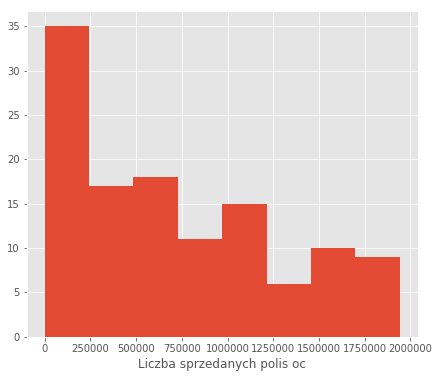

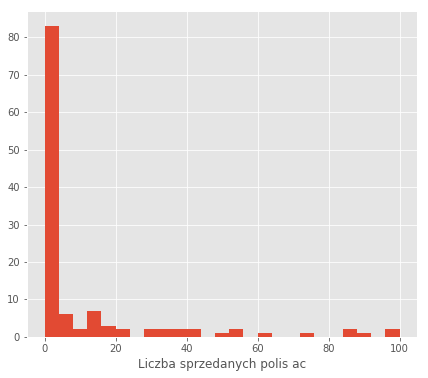

In [42]:
x = paris_ruin(k=500000, n=100, oc=0.1, m_oc=240, m=100, ac=40, m_ac=320, mi=25, s_oc=0, 
                        start_year=2000,end_year=2009, text=False, strategy=False)
plt.figure(1, figsize=(7, 6))
plt.xlabel("Liczba sprzedanych polis oc")
plt.hist(x[-3], bins='auto')
plt.figure(2, figsize=(7, 6))
plt.xlabel("Liczba sprzedanych polis ac")
plt.hist(x[-2], bins='auto')
plt.show()

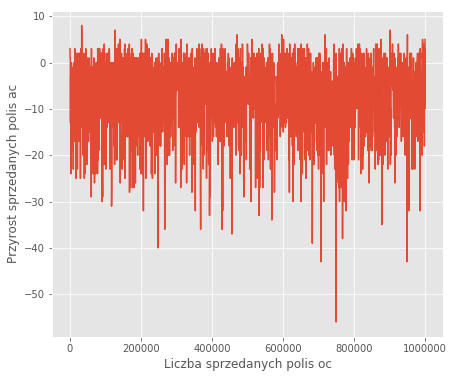

-7.321821821821822


In [45]:
n = np.arange(1000, 1000000, 500)
out = []
for i in n:
    x = end_of_month(n=i, oc=0.1, m_oc=240, m=100, ac=40, m_ac=320, mi=25, s_oc=0)
    out.append(x[1]-100)
plt.figure(figsize=(7, 6))
plt.xlabel('Liczba sprzedanych polis oc')
plt.ylabel('Przyrost sprzedanych polis ac')
plt.plot(n, out)
plt.show()
print(np.mean(out))

### 3.5 Strategia

Analizując poprzednie punkty możemy wysnuć pewne wnioski, takie jak to, że liczba sprzedanych polis ac jest mocno związana z liczbą polis oc, to że cena polisy ac powinna być mała w stosunku do popytu na nie oraz fakt, że liczba sprzedanych polis oc powinna być dla nas ważniejsza od samej ceny polisy. To znaczy, że ważniejsze jest utrzymanie dużej ilości klientów kosztem ceny pojedyńczej polisy oczywiście odrzucamy tutaj nierzeczywite przypadki wynikające z niestabilności modelu np. takie jak ten opisany powyżej.

Zaczniemy zatem od wyznaczenia optymalnej ceny pojedyńczej polisy oc. Będziemy badać ile firma wydała na odszkodowania w zeszłym miesiącu i wyznaczymy jaką kwotę średnio dostał od nas jeden klient. Niech zatem $x$ będzie wydaną kwotą na odszkodowania w zeszłym miesiącu, $n_p$ liczba klientów z polisami oc, $c_{oc}$ cena pojedyńczej polisy. Dostajemy zatem wzór:

$$c_{oc1} = \frac{x}{n}$$

Natomiast chcąc aby firma otrzymywała zyski mnożymy powstałą wartość przez $1+\theta$ gdzie $\theta>0$. Jak zostało już wspomniane rozkład Pareto jest ciężko-ogonowy zatem może dojść do sytuacji, że wyznaczona cena oc będzie większa od wartości popytu. W takiej sytuacji chcemy ją zmniejszać, gdyż tak jak wspomnieliśmy wcześniej liczba klientów jest bardzo ważna, idąc dalej tym tokiem rozumowania ustalamy pewną liczbę klientów. Kiedy liczba sprzedanych polis jest poniżej niej zmniejszamy cenę naszego oc. W ten sposób firma zyskuje więcej klientów kosztem ceny pojedyńczej polisy.

Skupiamy się także na przeznaczaniu pewnej kwoty na reklamowanie firmy. Ma to ogromny wpływ na liczbę nowych klientów. Uzależniliśmy tę kwotę od ceny oc pomnożonej przez pewne skalary oraz od tego jak dużo mamy klientów. Kiedy są powyżej pewnej wartości to zmniejszamy nakłady na marketing. Na początku próbowaliśmy uzależnić wydatki na marketing od całkowitego kapitału oraz liczby klientów ale bardzo szybko pojawiały się problemy z zbyt dużymi wartościami klientów, występował częsty błąd z wyjściem poza zakres liczbowy. Ograniczanie wartości nie przyniosło rezultatu, gdyż w tym modelu wystarczy wydawać $1000$ na marketing przez dłuższy czas żeby występowały problemy z zakresem liczbowym.

Cenę polis ac będziemy wyznaczać praktycznie tak samo jak polis oc. Jedynym wyjątkiem będą pewne progi. Tak jak zauważyliśmy wcześniej liczba klientów jest mocno zależna od stosunku ceny do popytu zatem gdy cena polisy będzie zbyt duża będziemy zmniejszać ją dopóki $\frac{c_{ac}}{m_{ac}}$ będzie większe od $\frac{1}{8}$ dodatkowo cena będzie zmniejszana jeżeli liczba naszych klientów spadnie poniżej pewnej stałej. Będzie ona znacznie mniejsza od tej dla polis oc. Dzieje się tak ze względu na to, że ceny ac i tak będą niewielkie więc przez pewne ograniczenie ilości sprzedanych polis zmniejszymy szansę na wystąpienie dużych realizacji zmiennych losowych z rozkładu Cauchy'ego.

In [28]:
repeat = 250
s = 0
for i in range(repeat):
    holder = paris_ruin(k=500000, n=100, oc=120, m_oc=240, m=100, ac=40, m_ac=320, mi=25, s_oc=0, 
                        start_year=2000,end_year=2009, text=False, strategy=True)
    s += holder[0]
print(s/repeat)

0.944


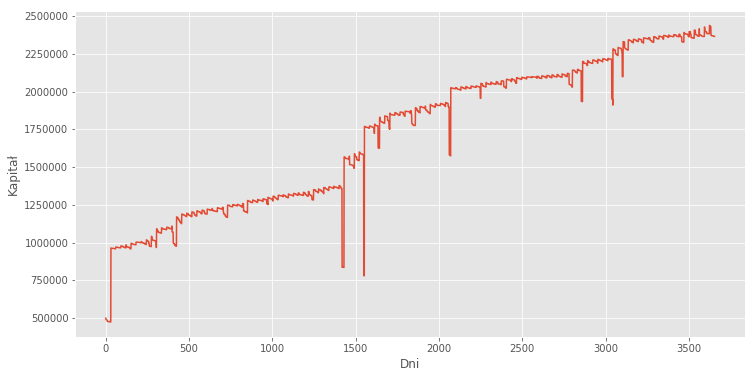

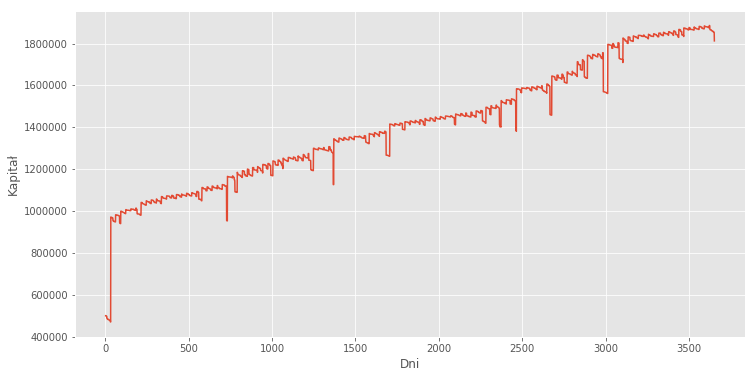

In [27]:
for i in range(2):
    plt.figure(i, figsize=(12,6))
    x = paris_ruin(k=500000, n=100, oc=120, m_oc=350, m=100, ac=40, m_ac=320, mi=25, s_oc=0, 
                   start_year=2000,end_year=2009, flag=False, text=False, strategy=True)
    plt.xlabel('Dni')
    plt.ylabel('Kapitał')
    plt.plot(x[2], x[1])
plt.show()

## 4.Wnioski

Badany przez nas model procesu ryzyka jest bardzo rozbudowany. Bierze pod uwagę wiele czynników takich jak popyt na polisy, czy róznorodność intensywności procesu Poissona w zależności od tego jaki mamy miesiąc oraz dzień tygodnia. Właśnie przez to model jest tak bardzo niestabilny. Pojawiają się także problemy z tym, że dopasowanie danych rzeczywistych nie da nam spodziewanego wyniku, zwykle kończyło się to stu procentową porażką firmy. Pewne stałe mają zbyt duży wpływ na model. Firma może w dosyć niewielkim okresie czasu wielokrotnie pomnożyć swój kapitał wydając śmiesznie małe sumy na marketing. Niestabilność modelu najlepiej oddaje opisany w podrozdziale $3.4$ przypadek nierzeczywisty, gdzie cena polisy oc wynosiła $0.1$ a uzyskaliśmy jedynie $10\%$ szans na ruinę firmy w ciągu 5 lat. Fakt, że gdy liczba sprzedanych polis ac spadnie do $0$ to już taka pozostanie też nie wpływa na realizm modelu pozytywnie. 

Tak jak wspomnieliśmy na początku model korzysta z wielu stałych. Problemy z nim mogą być spowodowane tym, że dane jakie wprowadzamy czyli takie, które wydają się nam sensowne tak naprawdę takie nie są. Być może mając dostęp do bazy danych prawdziwych firm ubezpieczeniowych moglibyśmy odpowiednio dobrać parametry takie jak popyt czy intensywność procesu Poissona tak aby faktycznie otrzymywać wyniki, które moglibyśmy porównywać z rzeczywistością. Niestety tych danych nie byliśmy w stanie uzyskać więc dobieraliśmy je tak aby firma nie bankrutowała od razu bądź jej kapitał nie rósł ciągle wykadniczo. W takiej sytuacji oraz dla mniejszego horyzontu czasowego możliwe, że model mógłby być wykorzystany do symulowania pewnych niewielkich firm. Jednak w tym momencie pomimo opracowania strategii, która obniżyła prawdopodobieństwo ruiny przedsiębiorstwa z około $55\%$ na $5.5\%$ nie zaproponowalibyśmy użycia jej firmie, której dobrze życzymy.